In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_average_loss(list_of_data, epochs):
    EPOCHS = epochs

    list_of_averages = []
    for data in list_of_data:
        ss = int(len(data)/EPOCHS)

        mean_scores = [data[0]]
        for i in range(EPOCHS):
            if i != 0:
                mean_scores.append(np.mean(data[ss*(i-1):ss*(i)]))
        
        list_of_averages.append(mean_scores)

    return list_of_averages

## Train and validation

In [14]:
train_data = np.load("../Results/allcolumns/train_loss_256_op.npy")
val_data = np.load("../Results/allcolumns/validation_loss_256_op.npy")

In [27]:
train_data = np.load("models/grid_01/grid_size_40/conv_train_loss_512_avgpool_es.npy")
val_data = np.load("models/grid_01/grid_size_40/conv_validation_loss_512_avgpool_es.npy")

In [28]:
EPOCHS = 100 # 73

train_step_size = int(len(train_data)/EPOCHS)
val_step_size = int(len(val_data)/EPOCHS)

mean_train_data = [train_data[0]]
mean_val_data = [val_data[0]]
for i in range(EPOCHS):
    if i != 0:
        mean_train_data.append(np.mean(train_data[train_step_size*(i-1):train_step_size*(i)]))
        mean_val_data.append(np.mean(val_data[val_step_size*(i-1):val_step_size*(i)]))

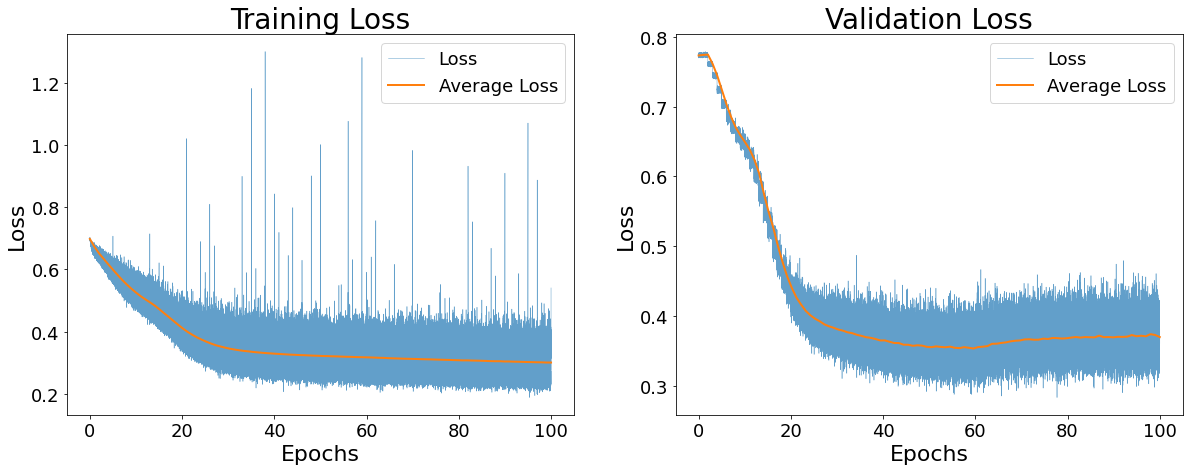

In [29]:
train_step = np.linspace(0, EPOCHS, len(train_data))
mean_train_step = np.linspace(0, EPOCHS, len(mean_train_data))
val_step = np.linspace(0, EPOCHS, len(val_data))
mean_val_step = np.linspace(0, EPOCHS, len(mean_val_data))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.plot(train_step, np.array(train_data), alpha=0.7, linewidth=0.5, label="Loss")
ax1.plot(mean_train_step, np.array(mean_train_data), linewidth=2, label="Average Loss")
ax1.set_title("Training Loss", fontsize=28)
ax1.set_xlabel("Epochs", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel("Loss", fontsize=22)
ax1.tick_params(axis='y', labelsize=18)
ax1.legend(fontsize=18, loc="upper right")

ax2.plot(val_step, np.array(val_data), alpha=0.7, linewidth=0.5, label="Loss")
ax2.plot(mean_val_step, np.array(mean_val_data), linewidth=2, label="Average Loss")
ax2.set_title("Validation Loss", fontsize=28)
ax2.set_xlabel("Epochs", fontsize=22)
ax2.tick_params(axis='x', labelsize=18)
ax2.set_ylabel("Loss", fontsize=22)
ax2.tick_params(axis='y', labelsize=18)
ax2.legend(fontsize=18, loc="upper right")

plt.show()

## Batch sizes

In [14]:
train_16 = np.load("../Results/batchsize/train_loss_32.npy")
train_128 = np.load("../Results/batchsize/train_loss_128.npy")
train_512 = np.load("../Results/batchsize/train_loss_512.npy")
train_1024 = np.load("../Results/batchsize/train_loss_2048.npy")

In [15]:
ACTUALLY = 60
EPOCHS = 40

ss_16 = int(len(train_16)/ACTUALLY)
ss_128 = int(len(train_128)/ACTUALLY)
ss_512 = int(len(train_512)/ACTUALLY)
ss_1024 = int(len(train_1024)/ACTUALLY)

train_16 = train_16[0:EPOCHS*ss_16]
train_128 = train_128[0:EPOCHS*ss_128]
train_512 = train_512[0:EPOCHS*ss_512]
train_1024 = train_1024[0:EPOCHS*ss_1024]

mean_16 = []
mean_128 = []
mean_512 = []
mean_1024 = []

for i in range(EPOCHS):
    if i != 0:
        mean_16.append(np.mean(train_16[ss_16*(i-1):ss_16*(i)]))
        mean_128.append(np.mean(train_128[ss_128*(i-1):ss_128*(i)]))
        mean_512.append(np.mean(train_512[ss_512*(i-1):ss_512*(i)]))
        mean_1024.append(np.mean(train_1024[ss_1024*(i-1):ss_1024*(i)]))

In [26]:
# ADD TIME ALSO?
# bs 16 = 1443 sec per epoch
# bs 128 = 543 sec per epoch
# bs 512 = 145 sec per epoch
# bs 1024 = 130 sec per per

time_16 = [(i*654)/60 for i in range(EPOCHS)]
time_128 = [(i*214)/60 for i in range(EPOCHS)]
time_512 = [(i*126)/60 for i in range(EPOCHS)]
time_1024 = [(i*95)/60 for i in range(EPOCHS)]

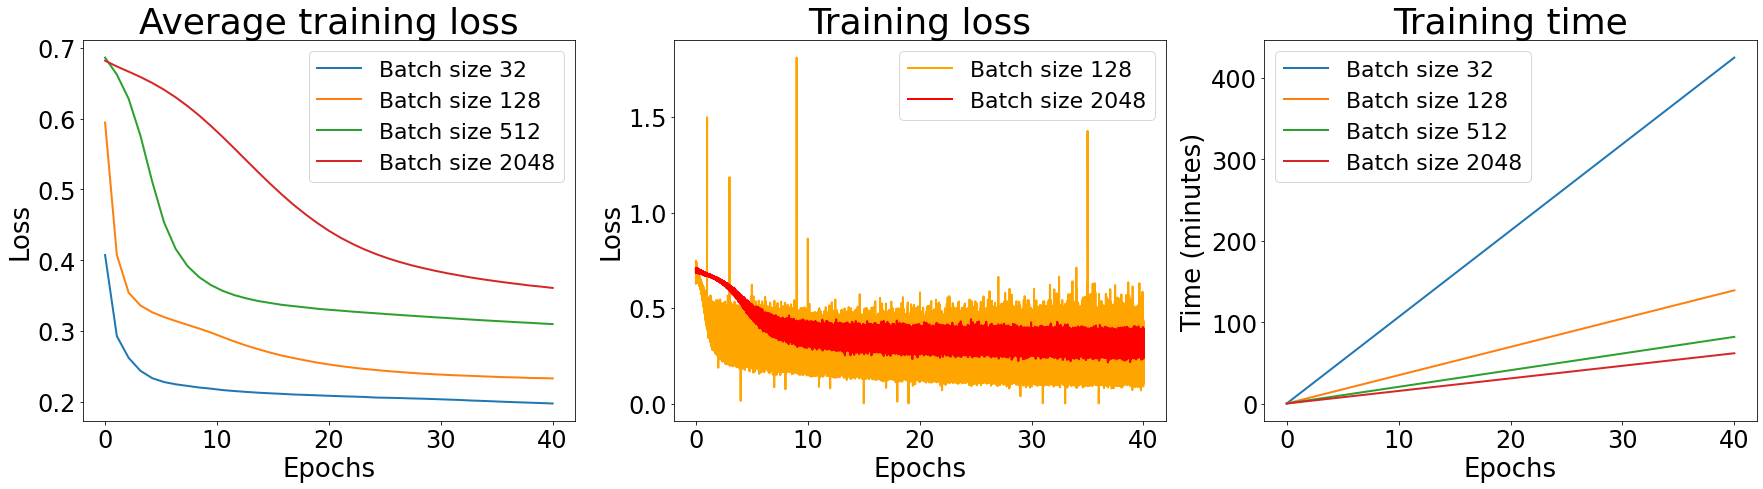

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 7))

train_step = np.linspace(0, EPOCHS, len(mean_16))
ax1.plot(train_step, np.array(mean_16), linewidth=2, label="Batch size 32")
ax1.plot(train_step, np.array(mean_128), linewidth=2, label="Batch size 128")
ax1.plot(train_step, np.array(mean_512), linewidth=2, label="Batch size 512") # Change to 1024
ax1.plot(train_step, np.array(mean_1024), linewidth=2, label="Batch size 2048") # Change to 512
ax1.set_title("Average training loss", fontsize=36)
ax1.set_xlabel("Epochs", fontsize=26)
ax1.tick_params(axis='x', labelsize=24)
ax1.set_ylabel("Loss", fontsize=26)
ax1.tick_params(axis='y', labelsize=24)
ax1.legend(fontsize=22, loc="upper right")

train_step1 = np.linspace(0, EPOCHS, len(train_128))
train_step2 = np.linspace(0, EPOCHS, len(train_512))
ax2.plot(train_step1, np.array(train_128), linewidth=2, label="Batch size 128", color="orange")
ax2.plot(train_step2, np.array(train_512), linewidth=2, label="Batch size 2048", color="red") # Change to 512
ax2.set_title("Training loss", fontsize=36)
ax2.set_xlabel("Epochs", fontsize=26)
ax2.tick_params(axis='x', labelsize=24)
ax2.set_ylabel("Loss", fontsize=26)
ax2.tick_params(axis='y', labelsize=24)
ax2.legend(fontsize=22, loc="upper right")

train_step3 = np.linspace(0, EPOCHS, len(time_16))
ax3.plot(train_step3, np.array(time_16), linewidth=2, label="Batch size 32")
ax3.plot(train_step3, np.array(time_128), linewidth=2, label="Batch size 128")
ax3.plot(train_step3, np.array(time_512), linewidth=2, label="Batch size 512")
ax3.plot(train_step3, np.array(time_1024), linewidth=2, label="Batch size 2048")
ax3.set_title("Training time", fontsize=36)
ax3.set_xlabel("Epochs", fontsize=26)
ax3.tick_params(axis='x', labelsize=24)
ax3.set_ylabel("Time (minutes)", fontsize=26)
ax3.tick_params(axis='y', labelsize=24)
ax3.legend(fontsize=22)

plt.show()

## Plot average training loss for different cell and grid sizes

In [4]:
train_c1n1 = np.load("models/grid_1/grid_size_1/train_loss.npy")
train_c05n1 = np.load("models/grid_05/grid_size_1/train_loss.npy")
train_c03n1 = np.load("models/grid_03/grid_size_1/train_loss.npy")
train_c01n1 = np.load("models/grid_01/grid_size_1/train_loss.npy")
validation_c1n1 = np.load("models/grid_1/grid_size_1/validation_loss.npy")
validation_c05n1 = np.load("models/grid_05/grid_size_1/validation_loss.npy")
validation_c03n1 = np.load("models/grid_03/grid_size_1/validation_loss.npy")
validation_c01n1 = np.load("models/grid_01/grid_size_1/validation_loss.npy")

train_c1n5 = np.load("models/grid_1/grid_size_5/train_loss.npy")
train_c05n5 = np.load("models/grid_05/grid_size_5/train_loss.npy")
train_c03n5 = np.load("models/grid_03/grid_size_5/train_loss.npy")
train_c01n5 = np.load("models/grid_01/grid_size_5/train_loss.npy")
validation_c1n5 = np.load("models/grid_1/grid_size_5/validation_loss.npy")
validation_c05n5 = np.load("models/grid_05/grid_size_5/validation_loss.npy")
validation_c03n5 = np.load("models/grid_03/grid_size_5/validation_loss.npy")
validation_c01n5 = np.load("models/grid_01/grid_size_5/validation_loss.npy")

In [5]:
train_averages_n1 = get_average_loss([train_c1n1, train_c05n1, train_c03n1, train_c01n1], 20)
mean_train_c1n1, mean_train_c05n1, mean_train_c03n1, mean_train_c01n1 = train_averages_n1
validation_averages_n1 = get_average_loss([validation_c1n1, validation_c05n1, validation_c03n1, validation_c01n1], 20)
mean_validation_c1n1, mean_validation_c05n1, mean_validation_c03n1, mean_validation_c01n1 = validation_averages_n1

train_averages_n5 = get_average_loss([train_c1n5, train_c05n5, train_c03n5, train_c01n5], 20)
mean_train_c1n5, mean_train_c05n5, mean_train_c03n5, mean_train_c01n5 = train_averages_n5
validation_averages_n5 = get_average_loss([validation_c1n5, validation_c05n5, validation_c03n5, validation_c01n5], 20)
mean_validation_c1n5, mean_validation_c05n5, mean_validation_c03n5, mean_validation_c01n5 = validation_averages_n5

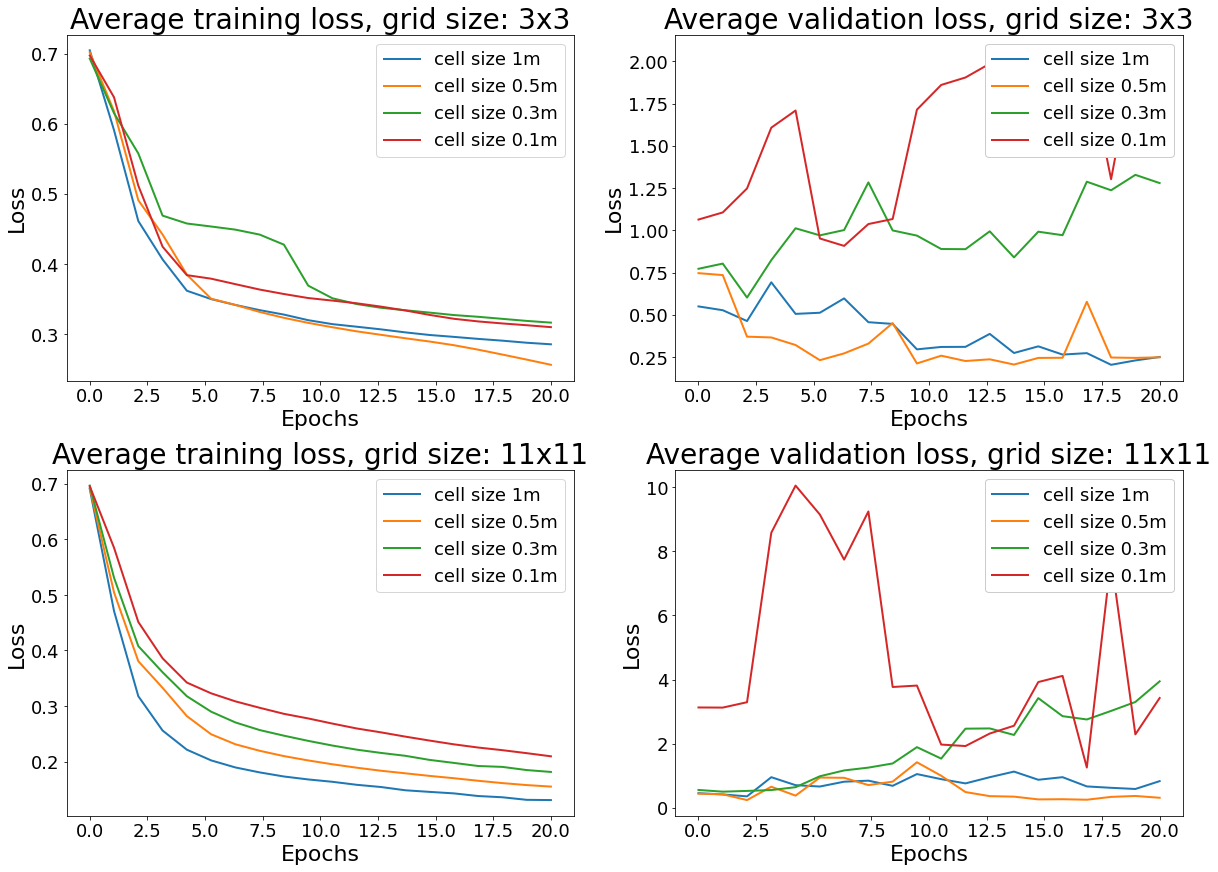

In [15]:
EPOCHS = 20

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

train_step = np.linspace(0, EPOCHS, len(mean_train_c1n1))
ax1.plot(train_step, np.array(mean_train_c1n1), linewidth=2, label="cell size 1m")
ax1.plot(train_step, np.array(mean_train_c05n1), linewidth=2, label="cell size 0.5m")
ax1.plot(train_step, np.array(mean_train_c03n1), linewidth=2, label="cell size 0.3m")
ax1.plot(train_step, np.array(mean_train_c01n1), linewidth=2, label="cell size 0.1m")
ax1.set_title("Average training loss, grid size: 3x3", fontsize=28)
ax1.set_xlabel("Epochs", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel("Loss", fontsize=22)
ax1.tick_params(axis='y', labelsize=18)
ax1.legend(fontsize=18)

validation_step = np.linspace(0, EPOCHS, len(mean_validation_c1n1))
ax2.plot(validation_step, np.array(mean_validation_c1n1), linewidth=2, label="cell size 1m")
ax2.plot(validation_step, np.array(mean_validation_c05n1), linewidth=2, label="cell size 0.5m")
ax2.plot(validation_step, np.array(mean_validation_c03n1), linewidth=2, label="cell size 0.3m")
ax2.plot(validation_step, np.array(mean_validation_c01n1), linewidth=2, label="cell size 0.1m")
ax2.set_title("Average validation loss, grid size: 3x3", fontsize=28)
ax2.set_xlabel("Epochs", fontsize=22)
ax2.tick_params(axis='x', labelsize=18)
ax2.set_ylabel("Loss", fontsize=22)
ax2.tick_params(axis='y', labelsize=18)
ax2.legend(fontsize=18, loc="upper right", framealpha=1)

train_step = np.linspace(0, EPOCHS, len(mean_train_c1n5))
ax3.plot(train_step, np.array(mean_train_c1n5), linewidth=2, label="cell size 1m")
ax3.plot(train_step, np.array(mean_train_c05n5), linewidth=2, label="cell size 0.5m")
ax3.plot(train_step, np.array(mean_train_c03n5), linewidth=2, label="cell size 0.3m")
ax3.plot(train_step, np.array(mean_train_c01n5), linewidth=2, label="cell size 0.1m")
ax3.set_title("Average training loss, grid size: 11x11", fontsize=28)
ax3.set_xlabel("Epochs", fontsize=22)
ax3.tick_params(axis='x', labelsize=18)
ax3.set_ylabel("Loss", fontsize=22)
ax3.tick_params(axis='y', labelsize=18)
ax3.legend(fontsize=18)
ax3_cur_pos = ax3.get_position()
ax3_new_pos = [ax3_cur_pos.x0, ax3_cur_pos.y0-0.02, ax3_cur_pos.width, ax3_cur_pos.height]
ax3.set_position(ax3_new_pos)

validation_step = np.linspace(0, EPOCHS, len(mean_validation_c1n5))
ax4.plot(validation_step, np.array(mean_validation_c1n5), linewidth=2, label="cell size 1m")
ax4.plot(validation_step, np.array(mean_validation_c05n5), linewidth=2, label="cell size 0.5m")
ax4.plot(validation_step, np.array(mean_validation_c03n5), linewidth=2, label="cell size 0.3m")
ax4.plot(validation_step, np.array(mean_validation_c01n5), linewidth=2, label="cell size 0.1m")
ax4.set_title("Average validation loss, grid size: 11x11", fontsize=28)
ax4.set_xlabel("Epochs", fontsize=22)
ax4.tick_params(axis='x', labelsize=18)
ax4.set_ylabel("Loss", fontsize=22)
ax4.tick_params(axis='y', labelsize=18)
ax4.legend(fontsize=18, loc="upper right", framealpha=1)
ax4_cur_pos = ax4.get_position()
ax4_new_pos = [ax4_cur_pos.x0, ax4_cur_pos.y0-0.02, ax4_cur_pos.width, ax4_cur_pos.height]
ax4.set_position(ax4_new_pos)

plt.show()

In [20]:
train_c1n10 = np.load("tuning/cellsize_gridsize/cell_1_grid_10_train_loss.npy")
train_c1n20 = np.load("tuning/cellsize_gridsize/cell_1_grid_20_train_loss.npy")
train_c1n30 = np.load("tuning/cellsize_gridsize/cell_1_grid_30_train_loss.npy")
train_c1n40 = np.load("tuning/cellsize_gridsize/cell_1_grid_40_train_loss.npy")
train_c1n50 = np.load("tuning/cellsize_gridsize/cell_1_grid_50_train_loss.npy")

train_c05n10 = np.load("tuning/cellsize_gridsize/cell_05_grid_10_train_loss.npy")
train_c05n20 = np.load("tuning/cellsize_gridsize/cell_05_grid_20_train_loss.npy")
train_c05n30 = np.load("tuning/cellsize_gridsize/cell_05_grid_30_train_loss.npy")
train_c05n40 = np.load("tuning/cellsize_gridsize/cell_05_grid_40_train_loss.npy")
train_c05n50 = np.load("tuning/cellsize_gridsize/cell_05_grid_50_train_loss.npy")

train_c03n10 = np.load("tuning/cellsize_gridsize/cell_03_grid_10_train_loss.npy")
train_c03n20 = np.load("tuning/cellsize_gridsize/cell_03_grid_20_train_loss.npy")
train_c03n30 = np.load("tuning/cellsize_gridsize/cell_03_grid_30_train_loss.npy")
train_c03n40 = np.load("tuning/cellsize_gridsize/cell_03_grid_40_train_loss.npy")
train_c03n50 = np.load("tuning/cellsize_gridsize/cell_03_grid_50_train_loss.npy")

train_c01n10 = np.load("tuning/cellsize_gridsize/cell_01_grid_10_train_loss.npy")
train_c01n20 = np.load("tuning/cellsize_gridsize/cell_01_grid_20_train_loss.npy")
train_c01n30 = np.load("tuning/cellsize_gridsize/cell_01_grid_30_train_loss.npy")
train_c01n40 = np.load("tuning/cellsize_gridsize/cell_01_grid_40_train_loss.npy")
train_c01n50 = np.load("tuning/cellsize_gridsize/cell_01_grid_50_train_loss.npy")

In [21]:
averages_list_c1 = get_average_loss([train_c1n10, train_c1n20, train_c1n30, train_c1n40, train_c1n50], 20)
mean_c1n10, mean_c1n20, mean_c1n30, mean_c1n40, mean_c1n50 = averages_list_c1

averages_list_c05 = get_average_loss([train_c05n10, train_c05n20, train_c05n30, train_c05n40, train_c05n50], 20)
mean_c05n10, mean_c05n20, mean_c05n30, mean_c05n40, mean_c05n50 = averages_list_c05

averages_list_c03 = get_average_loss([train_c03n10, train_c03n20, train_c03n30, train_c03n40, train_c03n50], 20)
mean_c03n10, mean_c03n20, mean_c03n30, mean_c03n40, mean_c03n50 = averages_list_c03

averages_list_c01 = get_average_loss([train_c01n10, train_c01n20, train_c01n30, train_c01n40, train_c01n50], 20)
mean_c01n10, mean_c01n20, mean_c01n30, mean_c01n40, mean_c01n50 = averages_list_c01

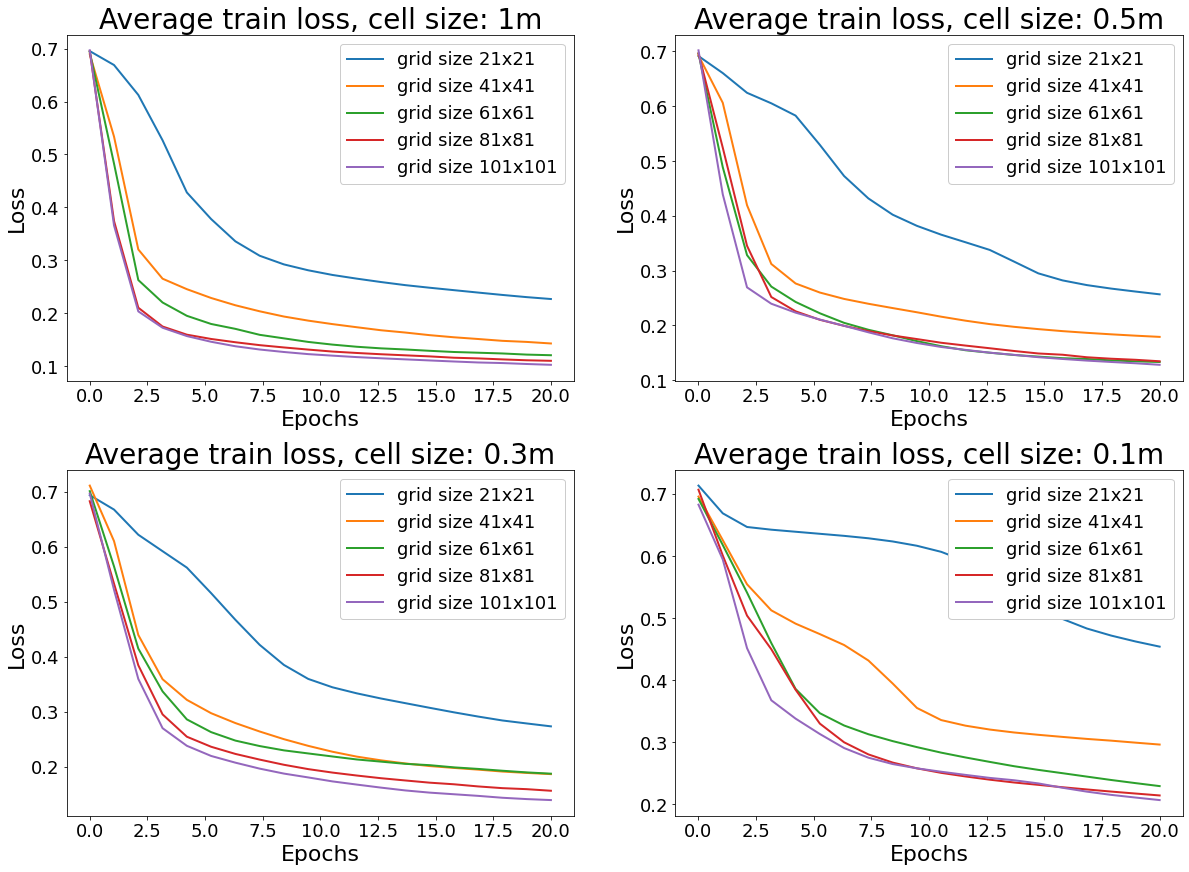

In [23]:
EPOCHS = 20

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

train_step = np.linspace(0, EPOCHS, len(mean_c1n10))
ax1.plot(train_step, np.array(mean_c1n10), linewidth=2, label="grid size 21x21")
ax1.plot(train_step, np.array(mean_c1n20), linewidth=2, label="grid size 41x41")
ax1.plot(train_step, np.array(mean_c1n30), linewidth=2, label="grid size 61x61")
ax1.plot(train_step, np.array(mean_c1n40), linewidth=2, label="grid size 81x81")
ax1.plot(train_step, np.array(mean_c1n50), linewidth=2, label="grid size 101x101")
ax1.set_title("Average train loss, cell size: 1m", fontsize=28)
ax1.set_xlabel("Epochs", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel("Loss", fontsize=22)
ax1.tick_params(axis='y', labelsize=18)
ax1.legend(fontsize=18, loc="upper right", framealpha=1)

train_step = np.linspace(0, EPOCHS, len(mean_c05n10))
ax2.plot(train_step, np.array(mean_c05n10), linewidth=2, label="grid size 21x21")
ax2.plot(train_step, np.array(mean_c05n20), linewidth=2, label="grid size 41x41")
ax2.plot(train_step, np.array(mean_c05n30), linewidth=2, label="grid size 61x61")
ax2.plot(train_step, np.array(mean_c05n40), linewidth=2, label="grid size 81x81")
ax2.plot(train_step, np.array(mean_c05n50), linewidth=2, label="grid size 101x101")
ax2.set_title("Average train loss, cell size: 0.5m", fontsize=28)
ax2.set_xlabel("Epochs", fontsize=22)
ax2.tick_params(axis='x', labelsize=18)
ax2.set_ylabel("Loss", fontsize=22)
ax2.tick_params(axis='y', labelsize=18)
ax2.legend(fontsize=18, loc="upper right", framealpha=1)

train_step = np.linspace(0, EPOCHS, len(mean_c03n10))
ax3.plot(train_step, np.array(mean_c03n10), linewidth=2, label="grid size 21x21")
ax3.plot(train_step, np.array(mean_c03n20), linewidth=2, label="grid size 41x41")
ax3.plot(train_step, np.array(mean_c03n30), linewidth=2, label="grid size 61x61")
ax3.plot(train_step, np.array(mean_c03n40), linewidth=2, label="grid size 81x81")
ax3.plot(train_step, np.array(mean_c03n50), linewidth=2, label="grid size 101x101")
ax3.set_title("Average train loss, cell size: 0.3m", fontsize=28)
ax3.set_xlabel("Epochs", fontsize=22)
ax3.tick_params(axis='x', labelsize=18)
ax3.set_ylabel("Loss", fontsize=22)
ax3.tick_params(axis='y', labelsize=18)
ax3.legend(fontsize=18, loc="upper right", framealpha=1)
ax3_cur_pos = ax3.get_position()
ax3_new_pos = [ax3_cur_pos.x0, ax3_cur_pos.y0-0.02, ax3_cur_pos.width, ax3_cur_pos.height]
ax3.set_position(ax3_new_pos)

train_step = np.linspace(0, EPOCHS, len(mean_c01n10))
ax4.plot(train_step, np.array(mean_c01n10), linewidth=2, label="grid size 21x21")
ax4.plot(train_step, np.array(mean_c01n20), linewidth=2, label="grid size 41x41")
ax4.plot(train_step, np.array(mean_c01n30), linewidth=2, label="grid size 61x61")
ax4.plot(train_step, np.array(mean_c01n40), linewidth=2, label="grid size 81x81")
ax4.plot(train_step, np.array(mean_c01n50), linewidth=2, label="grid size 101x101")
ax4.set_title("Average train loss, cell size: 0.1m", fontsize=28)
ax4.set_xlabel("Epochs", fontsize=22)
ax4.tick_params(axis='x', labelsize=18)
ax4.set_ylabel("Loss", fontsize=22)
ax4.tick_params(axis='y', labelsize=18)
ax4.legend(fontsize=18, loc="upper right", framealpha=1)
ax4_cur_pos = ax4.get_position()
ax4_new_pos = [ax4_cur_pos.x0, ax4_cur_pos.y0-0.02, ax4_cur_pos.width, ax4_cur_pos.height]
ax4.set_position(ax4_new_pos)

plt.show()

## Tuning

In [5]:
train_w312 = np.load("tuning2/windows/window_312_train_loss.npy")
train_w512 = np.load("tuning2/windows/window_512_train_loss.npy")
#train_w712 = np.load("tuning2/windows/window_712_train_loss.npy")

train_w322 = np.load("tuning2/windows/window_322_train_loss.npy")
train_w522 = np.load("tuning2/windows/window_522_train_loss.npy")
#train_w722 = np.load("tuning2/windows/window_722_train_loss.npy")

train_w313 = np.load("tuning2/windows/window_313_train_loss.npy")
train_w513 = np.load("tuning2/windows/window_513_train_loss.npy")
#train_w713 = np.load("tuning2/windows/window_713_train_loss.npy")

In [4]:
train_w312 = np.load("tuning/windows/window_312_train_loss.npy")
train_w512 = np.load("tuning/windows/window_512_train_loss.npy")
train_w712 = np.load("tuning/windows/window_712_train_loss.npy")

train_w322 = np.load("tuning/windows/window_322_train_loss.npy")
train_w522 = np.load("tuning/windows/window_522_train_loss.npy")
train_w722 = np.load("tuning/windows/window_722_train_loss.npy")

train_w313 = np.load("tuning/windows/window_313_train_loss.npy")
train_w513 = np.load("tuning/windows/window_513_train_loss.npy")
train_w713 = np.load("tuning/windows/window_713_train_loss.npy")

In [6]:
averages_train_standard = get_average_loss([train_w312, train_w512], 20)
mean_train_w312, mean_train_w512 = averages_train_standard

averages_train_stride = get_average_loss([train_w322, train_w522], 20)
mean_train_w322, mean_train_w522 = averages_train_stride

averages_train_pool = get_average_loss([train_w313, train_w513], 20)
mean_train_w313, mean_train_w513 = averages_train_pool

In [7]:
validation_w312 = np.load("tuning2/windows/window_312_validation_loss.npy")
validation_w512 = np.load("tuning2/windows/window_512_validation_loss.npy")
#validation_w712 = np.load("tuning2/windows/window_712_validation_loss.npy")

validation_w322 = np.load("tuning2/windows/window_322_validation_loss.npy")
validation_w522 = np.load("tuning2/windows/window_522_validation_loss.npy")
#validation_w722 = np.load("tuning2/windows/window_722_validation_loss.npy")

validation_w313 = np.load("tuning2/windows/window_313_validation_loss.npy")
validation_w513 = np.load("tuning2/windows/window_513_validation_loss.npy")
#validation_w713 = np.load("tuning2/windows/window_713_validation_loss.npy")

In [8]:
averages_validation_standard = get_average_loss([validation_w312, validation_w512], 20)
mean_validation_w312, mean_validation_w512 = averages_validation_standard

averages_validation_stride = get_average_loss([validation_w322, validation_w522], 20)
mean_validation_w322, mean_validation_w522 = averages_validation_stride

averages_validation_pool = get_average_loss([validation_w313, validation_w513], 20)
mean_validation_w313, mean_validation_w513 = averages_validation_pool

In [9]:
configs = [
    # Standard
    {"window": [3, 1, 2], "train": mean_train_w312, "validation": mean_validation_w312},
    {"window": [5, 1, 2], "train": mean_train_w512, "validation": mean_validation_w512},
    # Stride
    {"window": [3, 2, 2], "train": mean_train_w322, "validation": mean_validation_w322},
    {"window": [5, 2, 2], "train": mean_train_w522, "validation": mean_validation_w522},
    # Pool
    {"window": [3, 1, 3], "train": mean_train_w313, "validation": mean_validation_w313},
    {"window": [5, 1, 3], "train": mean_train_w513, "validation": mean_validation_w513},
]

In [10]:
for idx, config in enumerate(configs):
    window = config["window"]
    train = config["train"]
    validation = config["validation"]
    min_index = validation.index(np.min(validation))

    print(f"Result for channels: {', '.join(map(str, window))}")
    print(f"Validation Loss: {np.min(np.round(validation, 3))}")
    print(f"Train Loss: {np.round(train[min_index], 3)}")
    print("\n")

Result for channels: 3, 1, 2
Validation Loss: 0.427
Train Loss: 0.417


Result for channels: 5, 1, 2
Validation Loss: 0.258
Train Loss: 0.246


Result for channels: 3, 2, 2
Validation Loss: 0.24
Train Loss: 0.294


Result for channels: 5, 2, 2
Validation Loss: 0.216
Train Loss: 0.333


Result for channels: 3, 1, 3
Validation Loss: 0.132
Train Loss: 0.384


Result for channels: 5, 1, 3
Validation Loss: 0.364
Train Loss: 0.289




In [3]:
train_w312 = np.load("tuning/windows2/window_312_train_loss.npy")
train_w512 = np.load("tuning/windows2/window_512_train_loss.npy")

train_w322 = np.load("tuning/windows2/window_322_train_loss.npy")
train_w522 = np.load("tuning/windows2/window_522_train_loss.npy")

train_w313 = np.load("tuning/windows2/window_313_train_loss.npy")
train_w513 = np.load("tuning/windows2/window_513_train_loss.npy")

In [4]:
averages_train_standard = get_average_loss([train_w312, train_w512], 20)
mean_train_w312, mean_train_w512 = averages_train_standard

averages_train_stride = get_average_loss([train_w322, train_w522], 20)
mean_train_w322, mean_train_w522 = averages_train_stride

averages_train_pool = get_average_loss([train_w313, train_w513], 20)
mean_train_w313, mean_train_w513 = averages_train_pool

In [5]:
validation_w312 = np.load("tuning/windows2/window_312_validation_loss.npy")
validation_w512 = np.load("tuning/windows2/window_512_validation_loss.npy")

validation_w322 = np.load("tuning/windows2/window_322_validation_loss.npy")
validation_w522 = np.load("tuning/windows2/window_522_validation_loss.npy")

validation_w313 = np.load("tuning/windows2/window_313_validation_loss.npy")
validation_w513 = np.load("tuning/windows2/window_513_validation_loss.npy")

In [6]:
averages_validation_standard = get_average_loss([validation_w312, validation_w512], 20)
mean_validation_w312, mean_validation_w512 = averages_validation_standard

averages_validation_stride = get_average_loss([validation_w322, validation_w522], 20)
mean_validation_w322, mean_validation_w522 = averages_validation_stride

averages_validation_pool = get_average_loss([validation_w313, validation_w513], 20)
mean_validation_w313, mean_validation_w513 = averages_validation_pool

In [7]:
configs = [
    # Standard
    {"window": [3, 1, 2], "train": mean_train_w312, "validation": mean_validation_w312},
    {"window": [5, 1, 2], "train": mean_train_w512, "validation": mean_validation_w512},
    # Stride
    {"window": [3, 2, 2], "train": mean_train_w322, "validation": mean_validation_w322},
    {"window": [5, 2, 2], "train": mean_train_w522, "validation": mean_validation_w522},
    # Pool
    {"window": [3, 1, 3], "train": mean_train_w313, "validation": mean_validation_w313},
    {"window": [5, 1, 3], "train": mean_train_w513, "validation": mean_validation_w513},
]

In [8]:
for idx, config in enumerate(configs):
    window = config["window"]
    train = config["train"]
    validation = config["validation"]
    min_index = validation.index(np.min(validation))

    print(f"Result for channels: {', '.join(map(str, window))}")
    print(f"Validation Loss: {np.min(np.round(validation, 3))}")
    print(f"Train Loss: {np.round(train[min_index], 3)}")
    print("\n")

Result for channels: 3, 1, 2
Validation Loss: 0.349
Train Loss: 0.295


Result for channels: 5, 1, 2
Validation Loss: 0.313
Train Loss: 0.27


Result for channels: 3, 2, 2
Validation Loss: 0.36
Train Loss: 0.371


Result for channels: 5, 2, 2
Validation Loss: 0.488
Train Loss: 0.301


Result for channels: 3, 1, 3
Validation Loss: 0.352
Train Loss: 0.291


Result for channels: 5, 1, 3
Validation Loss: 0.31
Train Loss: 0.292




In [4]:
train_c816 = np.load("tuning/channels/channel_816_train_loss.npy")
train_c832 = np.load("tuning/channels/channel_832_train_loss.npy")
train_c1632 = np.load("tuning/channels/channel_1632_train_loss.npy")
train_c1664 = np.load("tuning/channels/channel_1664_train_loss.npy")
train_c3264 = np.load("tuning/channels/channel_3264_train_loss.npy")

validation_c816 = np.load("tuning/channels/channel_816_validation_loss.npy")
validation_c832 = np.load("tuning/channels/channel_832_validation_loss.npy")
validation_c1632 = np.load("tuning/channels/channel_1632_validation_loss.npy")
validation_c1664 = np.load("tuning/channels/channel_1664_validation_loss.npy")
validation_c3264 = np.load("tuning/channels/channel_3264_validation_loss.npy")

In [5]:
averages_train = get_average_loss([train_c816, train_c832, train_c1632, train_c1664, train_c3264], 20)
mean_train_c816, mean_train_c832, mean_train_c1632, mean_train_c1664, mean_train_c3264 = averages_train

averages_validation = get_average_loss([validation_c816, validation_c832, validation_c1632, validation_c1664, validation_c3264], 20)
mean_validation_c816, mean_validation_c832, mean_validation_c1632, mean_validation_c1664, mean_validation_c3264 = averages_validation

In [7]:
configs = [
    {"channel": [8, 16], "train": mean_train_c816, "validation": mean_validation_c816},
    {"channel": [8, 32], "train": mean_train_c832, "validation": mean_validation_c832},
    {"channel": [16, 32], "train": mean_train_c1632, "validation": mean_validation_c1632},
    {"channel": [16, 64], "train": mean_train_c1664, "validation": mean_validation_c1664},
    {"channel": [32, 64], "train": mean_train_c3264, "validation": mean_validation_c3264},
]

In [8]:
for idx, config in enumerate(configs):
    window = config["channel"]
    train = config["train"]
    validation = config["validation"]
    min_index = validation.index(np.min(validation))

    print(f"Result for channels: {', '.join(map(str, window))}")
    print(f"Validation Loss: {np.min(np.round(validation, 3))}")
    print(f"Train Loss: {np.round(train[min_index], 3)}")
    print("\n")

Result for channels: 8, 16
Validation Loss: 0.218
Train Loss: 0.271


Result for channels: 8, 32
Validation Loss: 0.279
Train Loss: 0.343


Result for channels: 16, 32
Validation Loss: 0.209
Train Loss: 0.284


Result for channels: 16, 64
Validation Loss: 0.255
Train Loss: 0.327


Result for channels: 32, 64
Validation Loss: 0.182
Train Loss: 0.246




## PointNet plotting

In [3]:
train_data = np.load("../PointNet/models/train_loss_512_norm_bs64_es_15p.npy")
val_data = np.load("../PointNet/models/validation_loss_512_norm_bs64_es_15p.npy")

In [4]:
EPOCHS = 100 # 73

train_step_size = int(len(train_data)/EPOCHS)
val_step_size = int(len(val_data)/EPOCHS)

mean_train_data = [train_data[0]]
mean_val_data = [val_data[0]]
for i in range(EPOCHS):
    if i != 0:
        mean_train_data.append(np.mean(train_data[train_step_size*(i-1):train_step_size*(i)]))
        mean_val_data.append(np.mean(val_data[val_step_size*(i-1):val_step_size*(i)]))

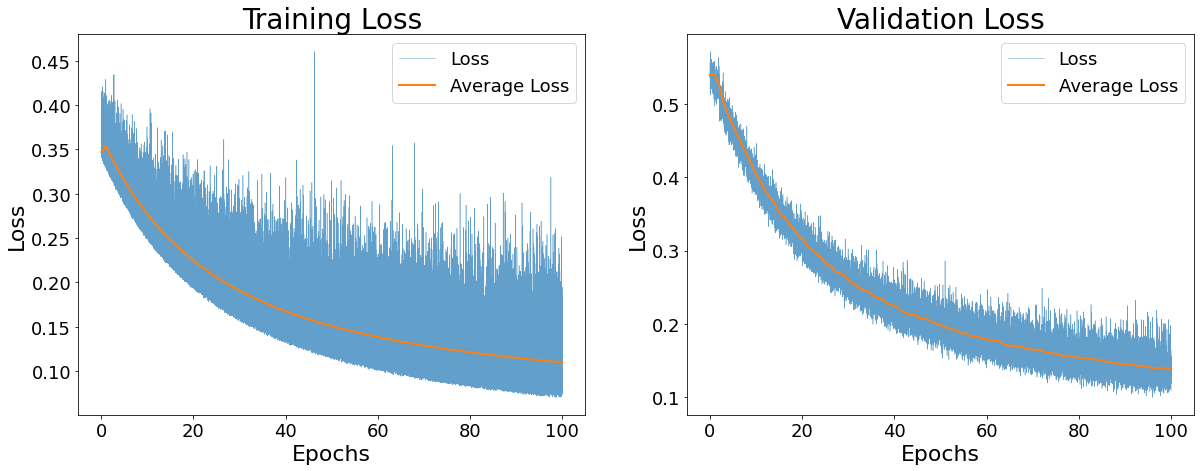

In [5]:
train_step = np.linspace(0, EPOCHS, len(train_data))
mean_train_step = np.linspace(0, EPOCHS, len(mean_train_data))
val_step = np.linspace(0, EPOCHS, len(val_data))
mean_val_step = np.linspace(0, EPOCHS, len(mean_val_data))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.plot(train_step, np.array(train_data), alpha=0.7, linewidth=0.5, label="Loss")
ax1.plot(mean_train_step, np.array(mean_train_data), linewidth=2, label="Average Loss")
ax1.set_title("Training Loss", fontsize=28)
ax1.set_xlabel("Epochs", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel("Loss", fontsize=22)
ax1.tick_params(axis='y', labelsize=18)
ax1.legend(fontsize=18, loc="upper right")

ax2.plot(val_step, np.array(val_data), alpha=0.7, linewidth=0.5, label="Loss")
ax2.plot(mean_val_step, np.array(mean_val_data), linewidth=2, label="Average Loss")
ax2.set_title("Validation Loss", fontsize=28)
ax2.set_xlabel("Epochs", fontsize=22)
ax2.tick_params(axis='x', labelsize=18)
ax2.set_ylabel("Loss", fontsize=22)
ax2.tick_params(axis='y', labelsize=18)
ax2.legend(fontsize=18, loc="upper right")

plt.show()

In [9]:
train_bs16 = np.load("../PointNet/tuning/npoints/256/train_loss_single.npy")
train_bs32 = np.load("../PointNet/tuning/npoints/512/train_loss_single.npy")
train_bs64 = np.load("../PointNet/tuning/npoints/1024/train_loss_single.npy")
train_bs128 = np.load("../PointNet/tuning/npoints/2048/train_loss_single.npy")

validation_bs16 = np.load("../PointNet/tuning/npoints/256/validation_loss_single.npy")
validation_bs32 = np.load("../PointNet/tuning/npoints/512/validation_loss_single.npy")
validation_bs64 = np.load("../PointNet/tuning/npoints/1024/validation_loss_single.npy")
validation_bs128 = np.load("../PointNet/tuning/npoints/2048/validation_loss_single.npy")

In [10]:
EPOCHS = 30

averages_train = get_average_loss([train_bs16, train_bs32, train_bs64, train_bs128], EPOCHS)
mean_train_bs16, mean_train_bs32, mean_train_bs64, mean_train_bs128 = averages_train

averages_validation = get_average_loss([validation_bs16, validation_bs32, validation_bs64, validation_bs128], EPOCHS)
mean_validation_bs16, mean_validation_bs32, mean_validation_bs64, mean_validation_bs128 = averages_validation

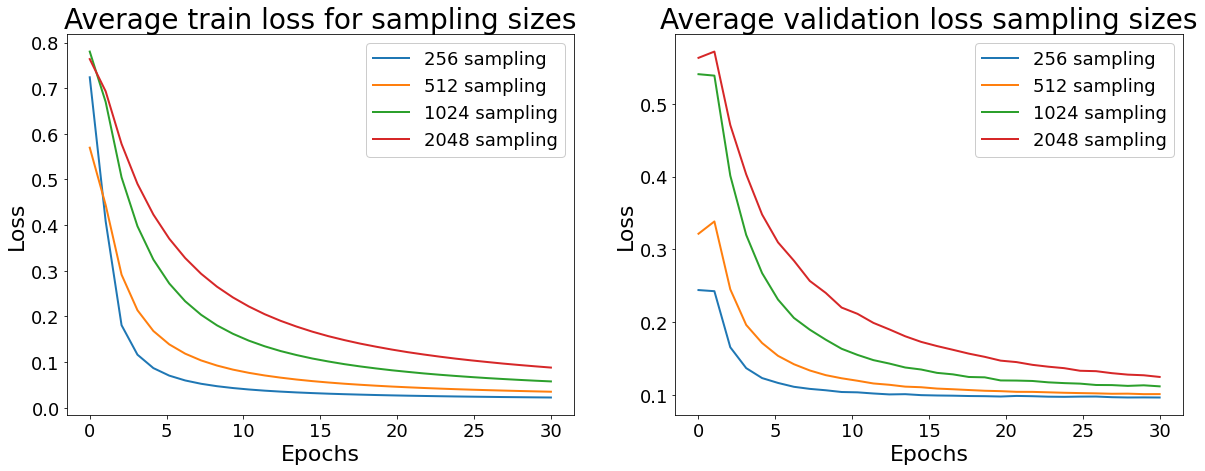

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

train_step = np.linspace(0, EPOCHS, len(mean_train_bs16))
ax1.plot(train_step, np.array(mean_train_bs16), linewidth=2, label="256 sampling")
ax1.plot(train_step, np.array(mean_train_bs32), linewidth=2, label="512 sampling")
ax1.plot(train_step, np.array(mean_train_bs64), linewidth=2, label="1024 sampling")
ax1.plot(train_step, np.array(mean_train_bs128), linewidth=2, label="2048 sampling")
ax1.set_title("Average train loss for sampling sizes", fontsize=28)
ax1.set_xlabel("Epochs", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel("Loss", fontsize=22)
ax1.tick_params(axis='y', labelsize=18)
ax1.legend(fontsize=18, loc="upper right", framealpha=1)

train_step = np.linspace(0, EPOCHS, len(mean_validation_bs16))
ax2.plot(train_step, np.array(mean_validation_bs16), linewidth=2, label="256 sampling")
ax2.plot(train_step, np.array(mean_validation_bs32), linewidth=2, label="512 sampling")
ax2.plot(train_step, np.array(mean_validation_bs64), linewidth=2, label="1024 sampling")
ax2.plot(train_step, np.array(mean_validation_bs128), linewidth=2, label="2048 sampling")
ax2.set_title("Average validation loss sampling sizes", fontsize=28)
ax2.set_xlabel("Epochs", fontsize=22)
ax2.tick_params(axis='x', labelsize=18)
ax2.set_ylabel("Loss", fontsize=22)
ax2.tick_params(axis='y', labelsize=18)
ax2.legend(fontsize=18, loc="upper right", framealpha=1)


plt.show()

## Combine images

In [8]:
img1 = plt.imread("../Bilder/kap4/pn_area.PNG")
img2 = plt.imread("../Bilder/kap4/pn_smallest_pred.PNG")

Text(0.5, 1.0, 'Scores for the predictions')

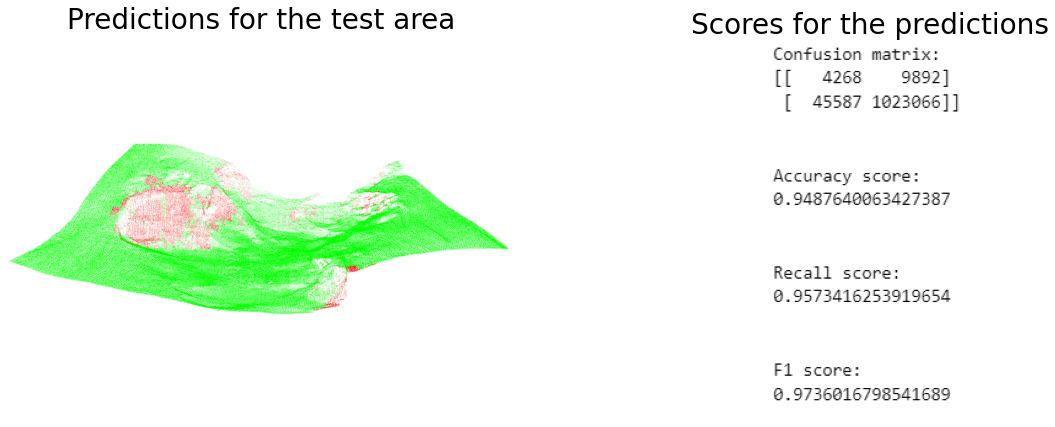

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.axis('off')
ax1.imshow(img1)
ax1.set_title("Predictions for the test area", fontsize=28, y=1.49)

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title("Scores for the predictions", fontsize=28)

In [12]:
img1 = plt.imread("../Bilder/kap4/pn_largest_pred.PNG")
img2 = plt.imread("../Bilder/kap4/pn_smallest_pred.PNG")

Text(0.5, 1.0, 'Scores with the lowest prediction')

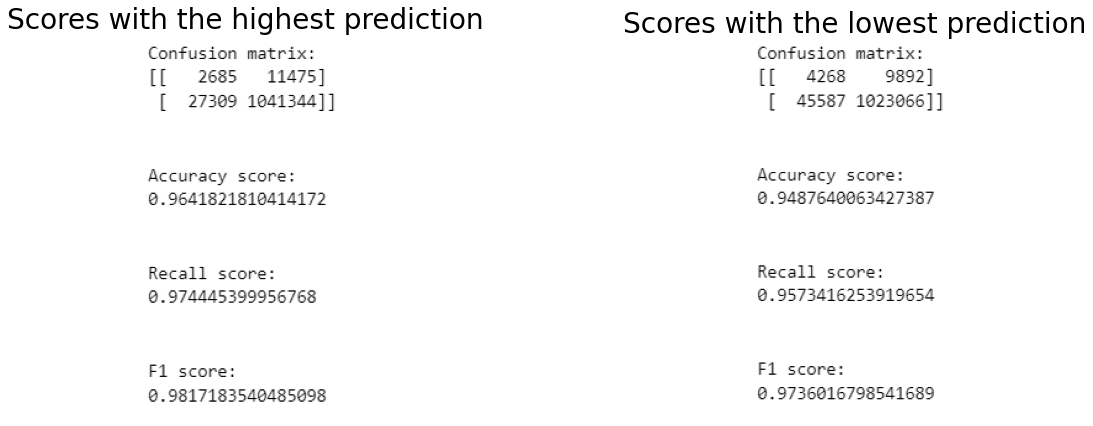

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.axis('off')
ax1.imshow(img1)
ax1.set_title("Scores with the highest prediction", fontsize=28, y=1.01)

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title("Scores with the lowest prediction", fontsize=28)

In [8]:
img3 = plt.imread("../Bilder/kap4/position_notlearning.PNG")

Text(0.5, 1.0, 'Not predicting obvious errors')

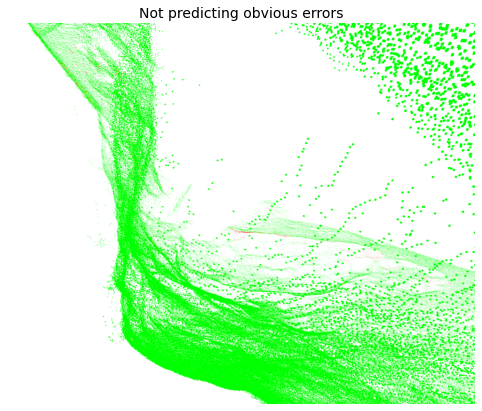

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 7))

ax1.axis('off')
ax1.imshow(img3)
ax1.set_title("Not predicting obvious errors", fontsize=14)

In [6]:
img1 = plt.imread("../Bilder/kap4/adjusted_columns_res1.PNG")
img2 = plt.imread("../Bilder/kap4/adjusted_columns_scores.PNG")

Text(0.5, 1.0, 'Scores for the predictions')

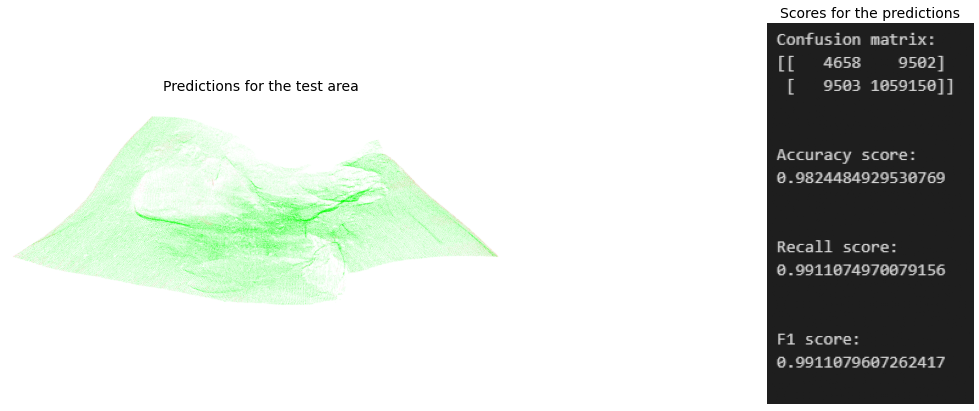

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.axis('off')
ax1.imshow(img1)
ax1.set_title("Predictions for the test area", fontsize=14)

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title("Scores for the predictions", fontsize=14)

In [11]:
img1 = plt.imread("../Bilder/kap4/small_grid_errors1.PNG")
img2 = plt.imread("../Bilder/kap4/small_grid_errors2.PNG")
img3 = plt.imread("../Bilder/kap4/small_grid_errors3.PNG")

Text(0.5, 1.05, 'Errors on edges/slopes')

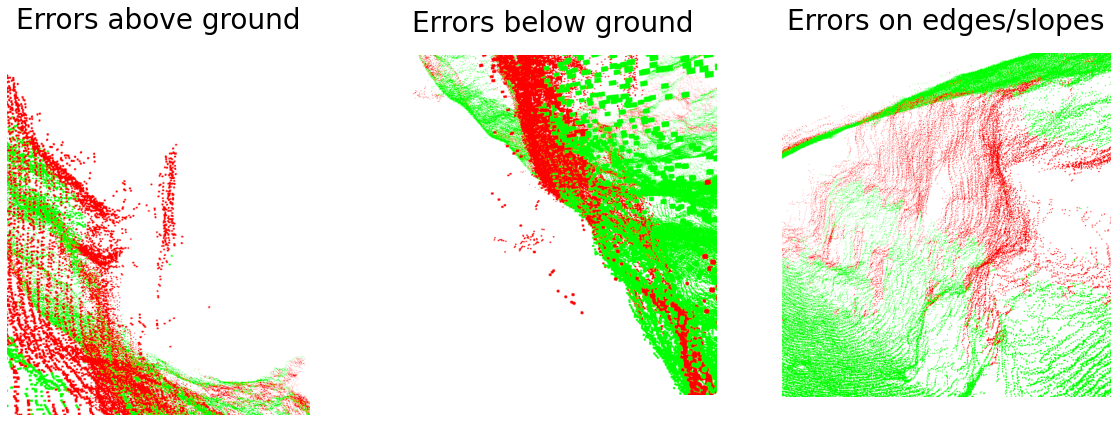

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 2, figsize=(20, 7))

ax1.axis('off')
ax1.imshow(img1)
ax1.set_title("Errors above ground", fontsize=28, y=1)

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title("Errors below ground", fontsize=28, y=1.05)

ax3.axis('off')
ax3.imshow(img3)
ax3.set_title("Errors on edges/slopes", fontsize=28, y=1.05)

In [21]:
img1 = plt.imread("../Bilder/kap4/untweaked_error.png")
img2 = plt.imread("../Bilder/kap4/Untweaked_error2.png")

Text(0.5, 1.1, 'A few accepted points below ground')

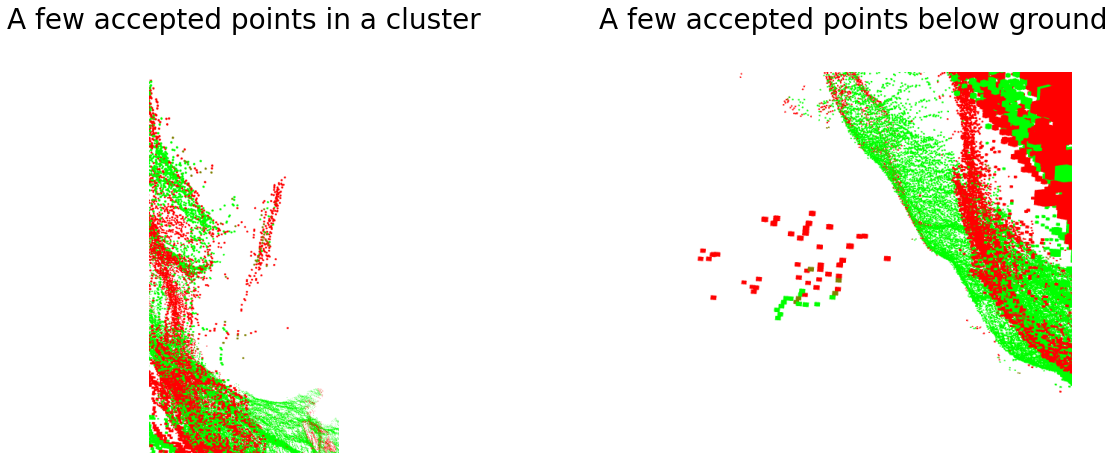

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.axis('off')
ax1.imshow(img1)
ax1.set_title("A few accepted points in a cluster", fontsize=28, y=1.1)

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title("A few accepted points below ground", fontsize=28, y=1.1)

In [25]:
img1 = plt.imread("../Bilder/kap4/c05grid1_area_result.PNG")
img2 = plt.imread("../Bilder/kap4/c05grid1_pred_result.PNG")

Text(0.5, 1.0, 'Scores for the predictions')

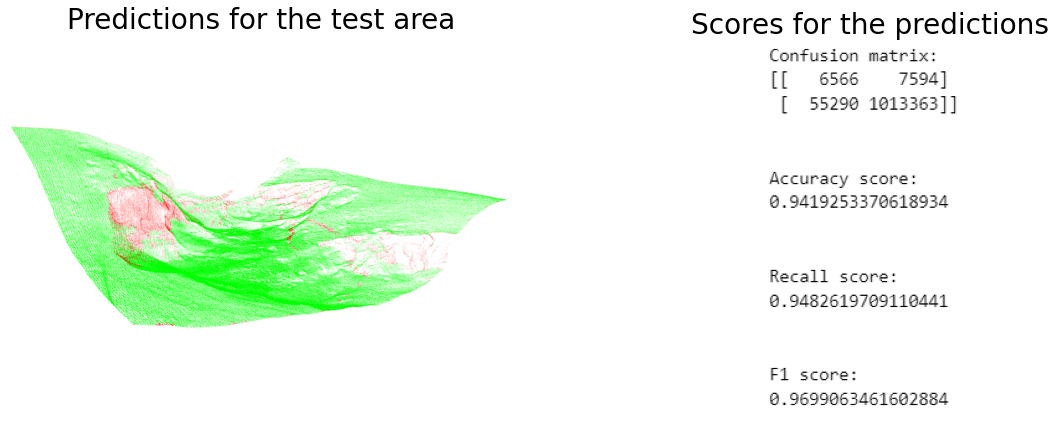

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.axis('off')
ax1.imshow(img1)
ax1.set_title("Predictions for the test area", fontsize=28, y=1.39)

ax2.axis('off')
ax2.imshow(img2)
ax2.set_title("Scores for the predictions", fontsize=28)

## Check tuning

## Tune channels

In [3]:
channels_6 = np.load("../Results/tuning/channels/channels_6_validation_loss.npy")
channels_16 = np.load("../Results/tuning/channels/channels_16_validation_loss.npy")
channels_32 = np.load("../Results/tuning/channels/channels_32_validation_loss.npy")

channels_6_16 = np.load("../Results/tuning/channels/channels_616_validation_loss.npy")
channels_6_32 = np.load("../Results/tuning/channels/channels_632_validation_loss.npy")
channels_6_64 = np.load("../Results/tuning/channels/channels_664_validation_loss.npy")
channels_16_32 = np.load("../Results/tuning/channels/channels_1632_validation_loss.npy")
channels_16_64 = np.load("../Results/tuning/channels/channels_1664_validation_loss.npy")
channels_32_64 = np.load("../Results/tuning/channels/channels_3264_validation_loss.npy")

channels_6_16_32 = np.load("../Results/tuning/channels/channels_61632_validation_loss.npy")
channels_6_16_64 = np.load("../Results/tuning/channels/channels_61664_validation_loss.npy")
channels_6_32_64 = np.load("../Results/tuning/channels/channels_63264_validation_loss.npy")
channels_16_32_64 = np.load("../Results/tuning/channels/channels_163264_validation_loss.npy")

train_channels_6 = np.load("../Results/tuning/channels/channels_6_train_loss.npy")
train_channels_16 = np.load("../Results/tuning/channels/channels_16_train_loss.npy")
train_channels_32 = np.load("../Results/tuning/channels/channels_32_train_loss.npy")

train_channels_6_16 = np.load("../Results/tuning/channels/channels_616_train_loss.npy")
train_channels_6_32 = np.load("../Results/tuning/channels/channels_632_train_loss.npy")
train_channels_6_64 = np.load("../Results/tuning/channels/channels_664_train_loss.npy")
train_channels_16_32 = np.load("../Results/tuning/channels/channels_1632_train_loss.npy")
train_channels_16_64 = np.load("../Results/tuning/channels/channels_1664_train_loss.npy")
train_channels_32_64 = np.load("../Results/tuning/channels/channels_3264_train_loss.npy")

train_channels_6_16_32 = np.load("../Results/tuning/channels/channels_61632_train_loss.npy")
train_channels_6_16_64 = np.load("../Results/tuning/channels/channels_61664_train_loss.npy")
train_channels_6_32_64 = np.load("../Results/tuning/channels/channels_63264_train_loss.npy")
train_channels_16_32_64 = np.load("../Results/tuning/channels/channels_163264_train_loss.npy")

In [13]:
averages_channel_1 = get_average_loss([channels_6, channels_16, channels_32], 20)
mean_channels_6, mean_channels_16, mean_channels_32 = averages_channel_1

averages_channel_2 = get_average_loss([channels_6_16, channels_6_32, channels_6_64, channels_16_32, channels_16_64, channels_32_64], 20)
mean_channels_6_16, mean_channels_6_32, mean_channels_6_64, mean_channels_16_32, mean_channels_16_64, mean_channels_32_64 = averages_channel_2

averages_channel_3 = get_average_loss([channels_6_16_32, channels_6_16_64, channels_6_32_64, channels_16_32_64], 20)
mean_channels_6_16_32, mean_channels_6_16_64, mean_channels_6_32_64, mean_channels_16_32_64 = averages_channel_3

train_averages_channel_1 = get_average_loss([train_channels_6, train_channels_16, train_channels_32], 20)
train_mean_channels_6, train_mean_channels_16, train_mean_channels_32 = train_averages_channel_1

train_averages_channel_2 = get_average_loss([train_channels_6_16, train_channels_6_32, train_channels_6_64, train_channels_16_32, train_channels_16_64, train_channels_32_64], 20)
train_mean_channels_6_16, train_mean_channels_6_32, train_mean_channels_6_64, train_mean_channels_16_32, train_mean_channels_16_64, train_mean_channels_32_64 = train_averages_channel_2

train_averages_channel_3 = get_average_loss([train_channels_6_16_32, train_channels_6_16_64, train_channels_6_32_64, train_channels_16_32_64], 20)
train_mean_channels_6_16_32, train_mean_channels_6_16_64, train_mean_channels_6_32_64, train_mean_channels_16_32_64 = train_averages_channel_3

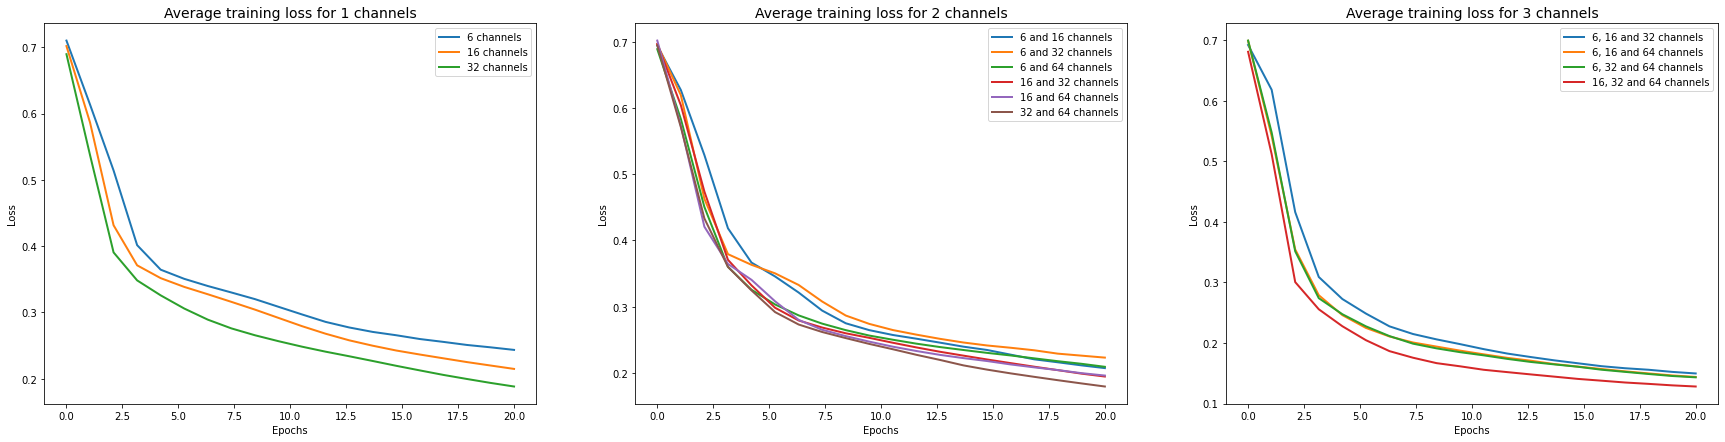

In [13]:
EPOCHS = 20

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 7))

train_step = np.linspace(0, EPOCHS, len(mean_channels_6))
ax1.plot(train_step, np.array(mean_channels_6), linewidth=2, label="6 channels")
ax1.plot(train_step, np.array(mean_channels_16), linewidth=2, label="16 channels")
ax1.plot(train_step, np.array(mean_channels_32), linewidth=2, label="32 channels")
ax1.set_title("Average training loss for 1 channels", fontsize=14)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

train_step = np.linspace(0, EPOCHS, len(mean_channels_6_16))
ax2.plot(train_step, np.array(mean_channels_6_16), linewidth=2, label="6 and 16 channels")
ax2.plot(train_step, np.array(mean_channels_6_32), linewidth=2, label="6 and 32 channels")
ax2.plot(train_step, np.array(mean_channels_6_64), linewidth=2, label="6 and 64 channels")
ax2.plot(train_step, np.array(mean_channels_16_32), linewidth=2, label="16 and 32 channels")
ax2.plot(train_step, np.array(mean_channels_16_64), linewidth=2, label="16 and 64 channels")
ax2.plot(train_step, np.array(mean_channels_32_64), linewidth=2, label="32 and 64 channels")
ax2.set_title("Average training loss for 2 channels", fontsize=14)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

train_step = np.linspace(0, EPOCHS, len(mean_channels_6_16_32))
ax3.plot(train_step, np.array(mean_channels_6_16_32), linewidth=2, label="6, 16 and 32 channels")
ax3.plot(train_step, np.array(mean_channels_6_16_64), linewidth=2, label="6, 16 and 64 channels")
ax3.plot(train_step, np.array(mean_channels_6_32_64), linewidth=2, label="6, 32 and 64 channels")
ax3.plot(train_step, np.array(mean_channels_16_32_64), linewidth=2, label="16, 32 and 64 channels")
ax3.set_title("Average training loss for 3 channels", fontsize=14)
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()

plt.show()

In [14]:
configs = [
    {"channels": [6], "results": mean_channels_6, "train": train_mean_channels_6},
    {"channels": [16], "results": mean_channels_16, "train": train_mean_channels_16},
    {"channels": [32], "results": mean_channels_32, "train": train_mean_channels_32},
    {"channels": [6, 16], "results": mean_channels_6_16, "train": train_mean_channels_6_16},
    {"channels": [6, 32], "results": mean_channels_6_32, "train": train_mean_channels_6_32},
    {"channels": [6, 64], "results": mean_channels_6_64, "train": train_mean_channels_6_64},
    {"channels": [16, 32], "results": mean_channels_16_32, "train": train_mean_channels_16_32},
    {"channels": [16, 64], "results": mean_channels_16_64, "train": train_mean_channels_16_64},
    {"channels": [32, 64], "results": mean_channels_32_64, "train": train_mean_channels_32_64},
    {"channels": [6, 16, 32], "results": mean_channels_6_16_32, "train": train_mean_channels_6_16_32},
    {"channels": [6, 16, 64], "results": mean_channels_6_16_64, "train": train_mean_channels_6_16_64},
    {"channels": [6, 32, 64], "results": mean_channels_6_32_64, "train": train_mean_channels_6_32_64},
    {"channels": [16, 32, 64], "results": mean_channels_16_32_64, "train": train_mean_channels_16_32_64},
]

In [15]:
for idx, config in enumerate(configs):
    channels = config["channels"]
    results = config["results"]
    train = config["train"]
    min_index = results.index(np.min(results))

    print(f"Result for channels: {', '.join(map(str, channels))}")
    print(f"Validation Loss: {np.min(np.round(results, 3))}")
    print(f"Train Loss: {np.round(train[min_index], 3)}")
    print("\n")

Result for channels: 6
Validation Loss: 0.347
Train Loss: 0.256


Result for channels: 16
Validation Loss: 0.194
Train Loss: 0.225


Result for channels: 32
Validation Loss: 1.096
Train Loss: 0.537


Result for channels: 6, 16
Validation Loss: 0.505
Train Loss: 0.418


Result for channels: 6, 32
Validation Loss: 0.133
Train Loss: 0.274


Result for channels: 6, 64
Validation Loss: 0.299
Train Loss: 0.25


Result for channels: 16, 32
Validation Loss: 0.21
Train Loss: 0.371


Result for channels: 16, 64
Validation Loss: 0.235
Train Loss: 0.421


Result for channels: 32, 64
Validation Loss: 0.166
Train Loss: 0.244


Result for channels: 6, 16, 32
Validation Loss: 0.476
Train Loss: 0.416


Result for channels: 6, 16, 64
Validation Loss: 0.447
Train Loss: 0.699


Result for channels: 6, 32, 64
Validation Loss: 0.512
Train Loss: 0.548


Result for channels: 16, 32, 64
Validation Loss: 0.328
Train Loss: 0.681




## Tune window

In [6]:
window_312 = np.load("../Results/tuning2/windows/window_312_validation_loss.npy")
window_512 = np.load("../Results/tuning2/windows/window_512_validation_loss.npy")

window_313 = np.load("../Results/tuning2/windows/window_313_validation_loss.npy")
window_513 = np.load("../Results/tuning2/windows/window_513_validation_loss.npy")

#window_322 = np.load("../Results/tuning2/windows/window_322_validation_loss.npy")
#window_522 = np.load("../Results/tuning2/windows/window_522_validation_loss.npy")

window_323 = np.load("../Results/tuning2/windows/window_323_validation_loss.npy")
window_523 = np.load("../Results/tuning2/windows/window_523_validation_loss.npy")

train_window_312 = np.load("../Results/tuning2/windows/window_312_train_loss.npy")
train_window_512 = np.load("../Results/tuning2/windows/window_512_train_loss.npy")

train_window_313 = np.load("../Results/tuning2/windows/window_313_train_loss.npy")
train_window_513 = np.load("../Results/tuning2/windows/window_513_train_loss.npy")

#train_window_322 = np.load("../Results/tuning2/windows/window_322_train_loss.npy")
#train_window_522 = np.load("../Results/tuning2/windows/window_522_train_loss.npy")

train_window_323 = np.load("../Results/tuning2/windows/window_323_train_loss.npy")
train_window_523 = np.load("../Results/tuning2/windows/window_523_train_loss.npy")

In [7]:
averages_window_p2 = get_average_loss([window_312, window_512], 20)
mean_window_312, mean_window_512 = averages_window_p2

averages_window_p3 = get_average_loss([window_313, window_513], 20)
mean_window_313, mean_window_513 = averages_window_p3

#averages_window_p2s2 = get_average_loss([window_322, window_522], 20)
#mean_window_322, mean_window_522 = averages_window_p2s2

averages_window_p3s2 = get_average_loss([window_323, window_523], 20)
mean_window_323, mean_window_523 = averages_window_p3s2

train_averages_window_p2 = get_average_loss([train_window_312, train_window_512], 20)
train_mean_window_312, train_mean_window_512 = train_averages_window_p2

train_averages_window_p3 = get_average_loss([train_window_313, train_window_513], 20)
train_mean_window_313, train_mean_window_513 = train_averages_window_p3

#averages_window_p2s2 = get_average_loss([window_322, window_522], 20)
#mean_window_322, mean_window_522 = averages_window_p2s2

train_averages_window_p3s2 = get_average_loss([train_window_323, train_window_523], 20)
train_mean_window_323, train_mean_window_523 = train_averages_window_p3s2


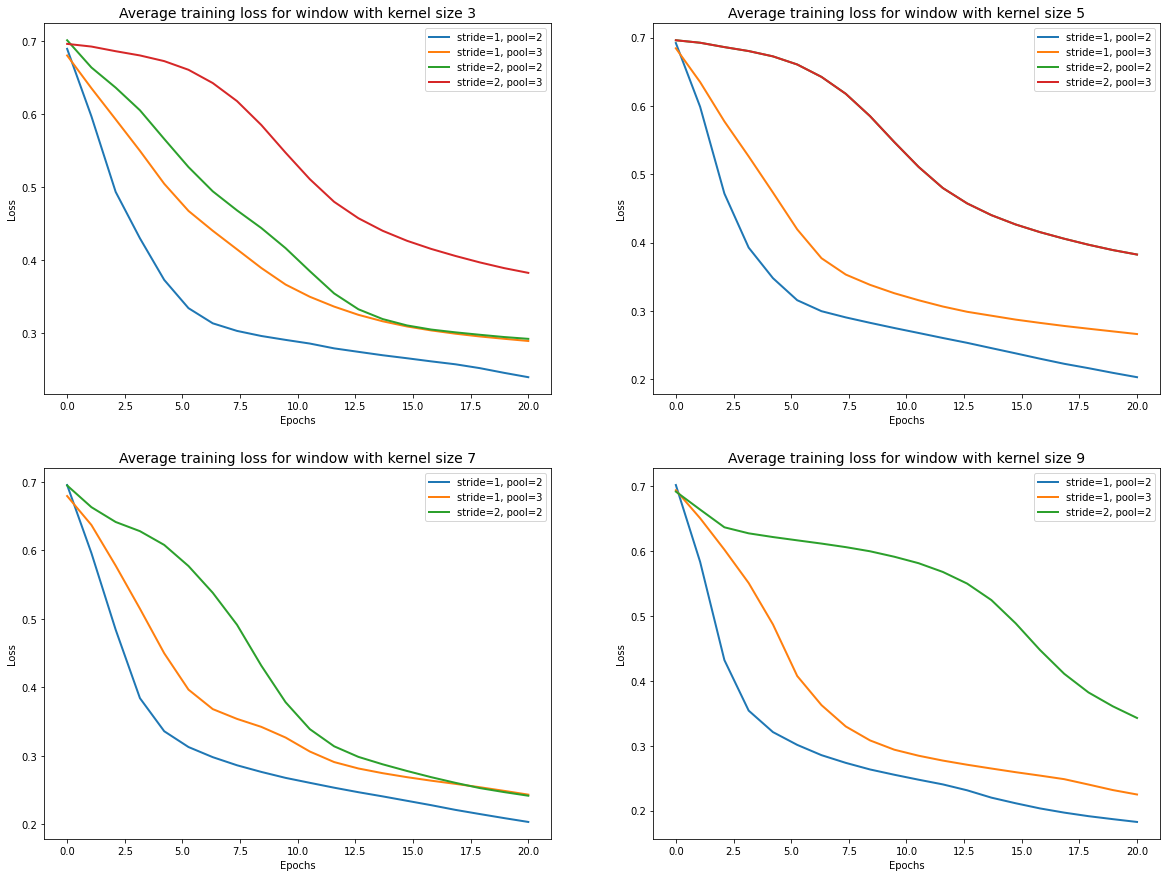

In [47]:
EPOCHS = 20

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))

train_step = np.linspace(0, EPOCHS, len(mean_window_313))
ax1.plot(train_step, np.array(mean_window_313), linewidth=2, label="stride=1, pool=2")
ax1.plot(train_step, np.array(mean_window_513), linewidth=2, label="stride=1, pool=3")
ax1.plot(train_step, np.array(mean_window_713), linewidth=2, label="stride=2, pool=2")
ax1.plot(train_step, np.array(mean_window_913), linewidth=2, label="stride=2, pool=3")
ax1.plot(train_step, np.array(mean_window_1113), linewidth=2, label="stride=2, pool=3")
ax1.set_title("Average training loss for window with kernel size 3", fontsize=14)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

train_step = np.linspace(0, EPOCHS, len(mean_window_512))
ax2.plot(train_step, np.array(mean_window_512), linewidth=2, label="stride=1, pool=2")
ax2.plot(train_step, np.array(mean_window_513), linewidth=2, label="stride=1, pool=3")
ax2.plot(train_step, np.array(mean_window_522), linewidth=2, label="stride=2, pool=2")
ax2.plot(train_step, np.array(mean_window_523), linewidth=2, label="stride=2, pool=3")
ax2.set_title("Average training loss for window with kernel size 5", fontsize=14)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

train_step = np.linspace(0, EPOCHS, len(mean_window_712))
ax3.plot(train_step, np.array(mean_window_712), linewidth=2, label="stride=1, pool=2")
ax3.plot(train_step, np.array(mean_window_713), linewidth=2, label="stride=1, pool=3")
ax3.plot(train_step, np.array(mean_window_722), linewidth=2, label="stride=2, pool=2")
ax3.set_title("Average training loss for window with kernel size 7", fontsize=14)
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()

train_step = np.linspace(0, EPOCHS, len(mean_window_912))
ax4.plot(train_step, np.array(mean_window_912), linewidth=2, label="stride=1, pool=2")
ax4.plot(train_step, np.array(mean_window_913), linewidth=2, label="stride=1, pool=3")
ax4.plot(train_step, np.array(mean_window_922), linewidth=2, label="stride=2, pool=2")
ax4.set_title("Average training loss for window with kernel size 9", fontsize=14)
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Loss")
ax4.legend()

plt.show()

In [8]:
configs = [
    {"window": [3, 1, 2], "results": mean_window_312, "train": train_mean_window_312},
    {"window": [5, 1, 2], "results": mean_window_512, "train": train_mean_window_512},

    {"window": [3, 1, 3], "results": mean_window_313, "train": train_mean_window_313},
    {"window": [5, 1, 3], "results": mean_window_513, "train": train_mean_window_513},

    #{"window": [3, 2, 3], "results": mean_window_322, "train": train_mean_window_322},
    #{"window": [5, 2, 3], "results": mean_window_522, "train": train_mean_window_522},

    {"window": [3, 2, 3], "results": mean_window_323, "train": train_mean_window_323},
    {"window": [5, 2, 3], "results": mean_window_523, "train": train_mean_window_523},
]

In [9]:
for idx, config in enumerate(configs):
    window = config["window"]
    results = config["results"]
    train = config["train"]
    min_index = results.index(np.min(results))

    print(f"Result for window: {', '.join(map(str, window))}")
    print(f"Validation Loss: {np.min(results)}")
    print(f"Train Loss: {np.round(train[min_index], 3)}")
    print("\n")

Result for window: 3, 1, 2
Validation Loss: 0.7234820127487183
Train Loss: 0.696


Result for window: 5, 1, 2
Validation Loss: 0.11738974203511073
Train Loss: 0.314


Result for window: 3, 1, 3
Validation Loss: 0.15199265390774017
Train Loss: 0.293


Result for window: 5, 1, 3
Validation Loss: 0.1850496475902995
Train Loss: 0.286


Result for window: 3, 2, 3
Validation Loss: 0.30576209103261437
Train Loss: 0.296


Result for window: 5, 2, 3
Validation Loss: 0.23153158687578163
Train Loss: 0.322




## Dropout tune

In [53]:
dropout_0 = np.load("tune2/dropout/dropout_0_validation_loss.npy")
dropout_1 = np.load("tune2/dropout/dropout_1_validation_loss.npy")
dropout_2 = np.load("tune2/dropout/dropout_2_validation_loss.npy")
dropout_3 = np.load("tune2/dropout/dropout_3_validation_loss.npy")
dropout_4 = np.load("tune2/dropout/dropout_4_validation_loss.npy")

In [54]:
averages_dropout = get_average_loss([dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 20)
mean_dropout_0, mean_dropout_1, mean_dropout_2, mean_dropout_3, mean_dropout_4 = averages_dropout

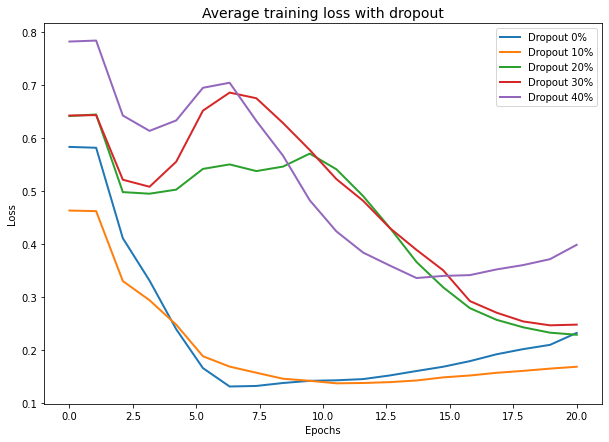

In [55]:
EPOCHS = 20

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 7))

train_step = np.linspace(0, EPOCHS, len(mean_dropout_0))
ax1.plot(train_step, np.array(mean_dropout_0), linewidth=2, label="Dropout 0%")
ax1.plot(train_step, np.array(mean_dropout_1), linewidth=2, label="Dropout 10%")
ax1.plot(train_step, np.array(mean_dropout_2), linewidth=2, label="Dropout 20%")
ax1.plot(train_step, np.array(mean_dropout_3), linewidth=2, label="Dropout 30%")
ax1.plot(train_step, np.array(mean_dropout_4), linewidth=2, label="Dropout 40%")
ax1.set_title("Average training loss with dropout", fontsize=14)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

plt.show()

In [7]:
configs3 = [
    {"channel1": 32, "channel2": 64},
    {"channel1": 32, "channel2": 128},
    {"channel1": 32, "channel2": 256},
    {"channel1": 64, "channel2": 128},
    {"channel1": 64, "channel2": 256},
    {"channel1": 128, "channel2": 256},
]

In [8]:
for idx, res in enumerate(tune_results):
    channel1 = configs3[idx]["channel1"]
    channel2 = configs3[idx]["channel2"]
    print(f"Result for channel1: {channel1}, channel2: {channel2}")
    print(f"Training loss: {res[0]}")
    print(f"Validation loss: {res[1]}\n")

Result for channel1: 32, channel2: 64
Training loss: 0.3127943390871982
Validation loss: 0.20351562902401094

Result for channel1: 32, channel2: 128
Training loss: 0.29326552697759695
Validation loss: 0.15763304347692525

Result for channel1: 32, channel2: 256
Training loss: 0.29807592719177234
Validation loss: 0.2107466233780901

Result for channel1: 64, channel2: 128
Training loss: 0.30129404527910647
Validation loss: 0.18244858123303948

Result for channel1: 64, channel2: 256
Training loss: 0.2915314816198783
Validation loss: 0.17885841691921728

Result for channel1: 128, channel2: 256
Training loss: 0.29026891331688887
Validation loss: 0.160837849790983

